# HitPredict

Hit predict will predict the popularity of a song based on some of its musical properties. We used the Spotify DB dataset from kaggle, which contains numerous rows of features of over 230.000 tracks. It was assembled using Spotify's API.

As always we started with importing the libraries that we'll be using.

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
np.random.seed(10)

The database is in .csv format, we used Pandas' read_csv() function to import it to Python. We visualize the data below.

In [2]:
data = pd.read_csv('SpotifyFeatures.csv')
print("Number of rows: {0}".format(len(data)))
data.head()

Number of rows: 232725


,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [3]:
# Let's have a look at the most popular songs adn artists in the dataset
data[data['popularity'] >= 95].sort_values(by=['artist_name', 'track_name'])

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
138916,Reggaeton,Anuel Aa,Secreto,5W83ErFkO3aKAIS1WMi6u0,96,0.6020,0.807,258800,0.803,0.008530,B,0.1360,-4.156,Major,0.1260,91.987,4/4,0.706
9027,Dance,Ariana Grande,7 rings,14msK75pk3pA33pzPVNtBF,100,0.5780,0.725,178640,0.321,0.000000,C#,0.0884,-10.744,Minor,0.3230,70.142,4/4,0.319
107804,Pop,Ariana Grande,7 rings,14msK75pk3pA33pzPVNtBF,100,0.5780,0.725,178640,0.321,0.000000,C#,0.0884,-10.744,Minor,0.3230,70.142,4/4,0.319
9026,Dance,Ariana Grande,"break up with your girlfriend, i'm bored",4kV4N9D1iKVxx1KLvtTpjS,99,0.0421,0.726,190440,0.554,0.000000,F,0.1060,-5.290,Minor,0.0917,169.999,4/4,0.335
107802,Pop,Ariana Grande,"break up with your girlfriend, i'm bored",4kV4N9D1iKVxx1KLvtTpjS,99,0.0421,0.726,190440,0.554,0.000000,F,0.1060,-5.290,Minor,0.0917,169.999,4/4,0.335
9031,Dance,Ariana Grande,"thank u, next",2rPE9A1vEgShuZxxzR2tZH,95,0.2800,0.724,207333,0.647,0.000000,C#,0.1020,-5.642,Major,0.0658,106.960,4/4,0.435
107814,Pop,Ariana Grande,"thank u, next",2rPE9A1vEgShuZxxzR2tZH,95,0.2800,0.724,207333,0.647,0.000000,C#,0.1020,-5.642,Major,0.0658,106.960,4/4,0.435
9037,Dance,Ava Max,Sweet but Psycho,25sgk305KZfyuqVBQIahim,97,0.0691,0.719,187436,0.704,0.000000,C#,0.1660,-4.724,Major,0.0476,133.002,4/4,0.628
107829,Pop,Ava Max,Sweet but Psycho,25sgk305KZfyuqVBQIahim,97,0.0691,0.719,187436,0.704,0.000000,C#,0.1660,-4.724,Major,0.0476,133.002,4/4,0.628
138915,Reggaeton,Bad Bunny,MIA (feat. Drake),116H0KvKr2Zl4RPuVBruDO,95,0.0141,0.817,210368,0.539,0.000496,F#,0.0990,-6.349,Minor,0.0621,97.062,4/4,0.158


Looks like some songs are present more than once (i.e. Ariana Grande: 7 rings). This could have an unwanted effect on the learning so let's only use one row for each song.

In [4]:
data = data.drop_duplicates(subset='track_id', keep="last")
len(data)

176774

Track ID is not giving us any useful information so lets just get rid of it. As well as we need to remove the name of the track and the name of the artist from the dataset because proccessing them would just confuse the network.

In [5]:
del data['track_id']
del data['artist_name']
del data['track_name']

In [6]:
data.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,176774.000000,176774.000000,176774.000000,1.767740e+05,176774.000000,176774.000000,176774.000000,176774.000000,176774.000000,176774.000000,176774.000000
mean,36.506681,0.404135,0.541069,2.361272e+05,0.557025,0.172073,0.224531,-10.137597,0.127395,117.203250,0.451595
std,17.584157,0.366302,0.190387,1.305132e+05,0.275839,0.322936,0.211027,6.395557,0.204345,31.325085,0.267820
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,25.000000,0.045600,0.415000,1.782530e+05,0.344000,0.000000,0.097500,-12.851000,0.036800,92.006000,0.222000
50%,37.000000,0.288000,0.558000,2.194530e+05,0.592000,0.000070,0.130000,-8.191000,0.049400,115.006000,0.440000
75%,49.000000,0.791000,0.683000,2.685470e+05,0.789000,0.090800,0.277000,-5.631000,0.102000,138.798500,0.667000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000


In [7]:
# see how the different columns correlate with popularity
data.corr()['popularity'][1:].sort_values(ascending=False)

loudness            0.324232
energy              0.236634
danceability        0.219993
tempo               0.083406
valence             0.048536
duration_ms         0.018673
instrumentalness   -0.149936
liveness           -0.162085
speechiness        -0.163183
acousticness       -0.361805
Name: popularity, dtype: float64

In [8]:
del data['duration_ms']

First and foremost let's check for any 0 data points that we might need to replace:

In [9]:
print(pd.isnull(data).sum())

genre               0
popularity          0
acousticness        0
danceability        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64


Fortunately there are none, let's move on with some of the feature engineering that we have done. 

Most values are numerical and need no preprocessing. We do have to convert however some text based rows into numbers which can be fed to the network afterwards.
Such rows are Key, Mode and Time Signature all of which will be replaced with integers 1 through the number of unique types that the given row may contain. 

I was not familiar with most of these terms, below you will find short descriptions that helped me better understand them.
Time signature: (also known as meter signature, metre signature, or measure signature) is a notational convention used in Western musical notation to specify how many beats (pulses) are contained in each measure (bar), and which note value is equivalent to a beat.
Mode: In the theory of Western music, it is a type of musical scale coupled with a set of characteristic melodic behaviors.

In [10]:
categorical_features = ["genre","time_signature","key","mode"]
n_items = len(data)
for feat in categorical_features:
    print("Proccessing %s. number of unique fields: %d" % (feat, data[feat].nunique()))
    if data[feat].nunique()<50:
        print(data[feat].unique())
        print("Number of occurance of each unique value:")
        print(data.groupby(feat).count().iloc[:,0])
        for feat_value in data[feat].unique():
            if (len(data[data[feat]==feat_value]) / n_items <= 0.02):
                print("Adding %s category to the 'OTHER' category." % feat_value)
                data[feat] = data[feat].apply(lambda x: "OTHER" if x==feat_value else x, 1)
                
        print("Final number of unique fields:")
        print(data.groupby(feat).count().iloc[:,0]) 
        print("\n")

Proccessing genre. number of unique fields: 27
['Movie' 'A Capella' 'Alternative' 'Country' 'Dance' 'Electronic' 'Anime'
 'Folk' 'Blues' 'R&B' 'Opera' 'Hip-Hop' "Children's Music"
 'Children’s Music' 'Rap' 'Indie' 'Classical' 'Pop' 'Reggae' 'Reggaeton'
 'Jazz' 'Rock' 'Ska' 'Comedy' 'Soul' 'Soundtrack' 'World']
Number of occurance of each unique value:
genre
A Capella            119
Alternative         1839
Anime               8557
Blues               7352
Children's Music    5403
Children’s Music    3616
Classical           8519
Comedy              9679
Country             7561
Dance               2756
Electronic          8259
Folk                4819
Hip-Hop             2102
Indie               5212
Jazz                8331
Movie               7484
Opera               7891
Pop                 5264
R&B                 4033
Rap                 6410
Reggae              7760
Reggaeton           8876
Rock                8609
Ska                 8836
Soul                9000
Soundtrack     

In [11]:
# Looks like we have 2 children's music category..
data[data['genre'] == 'Children’s Music'].head()

,genre,popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
77065,Children’s Music,78,0.55800,0.645,0.418,0.0003,F#,0.562,-10.065,Minor,0.2900,96.963,4/4,0.1230
77066,Children’s Music,80,0.44300,0.656,0.432,0.0000,F#,0.132,-9.481,Minor,0.2170,97.022,4/4,0.0897
77068,Children’s Music,76,0.11100,0.803,0.599,0.0000,C#,0.236,-5.169,Major,0.0985,130.107,4/4,0.4840
77075,Children’s Music,75,0.02090,0.561,0.782,0.0000,C,0.315,-5.863,Major,0.0400,94.004,4/4,0.4860
77082,Children’s Music,75,0.00756,0.448,0.826,0.0000,D,0.117,-3.244,Minor,0.0319,77.093,4/4,0.1900


https://www.youtube.com/watch?v=9XaS93WMRQQ
https://www.youtube.com/watch?v=1l8vIAvAerE
These don't really look like 'Children's Music', so let's remove them.

In [12]:
data = data[data.genre != 'Children’s Music']

In [13]:
data[data['genre'] == 'Children\'s Music'].head()

,genre,popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
71649,Children's Music,47,0.302,0.901,0.526,0.000000,C#,0.0540,-7.296,Minor,0.0362,109.946,4/4,0.706
71650,Children's Music,47,0.202,0.565,0.758,0.000000,B,0.0552,-5.205,Major,0.0294,127.817,4/4,0.605
71651,Children's Music,46,0.528,0.737,0.549,0.000087,A,0.2990,-13.215,Major,0.0382,124.980,4/4,0.840
71652,Children's Music,44,0.688,0.686,0.121,0.885000,G,0.0793,-20.751,Major,0.1030,148.002,4/4,0.818
71653,Children's Music,47,0.249,0.867,0.729,0.000000,C#,0.0802,-6.616,Major,0.0373,120.129,4/4,0.793


These look OK.

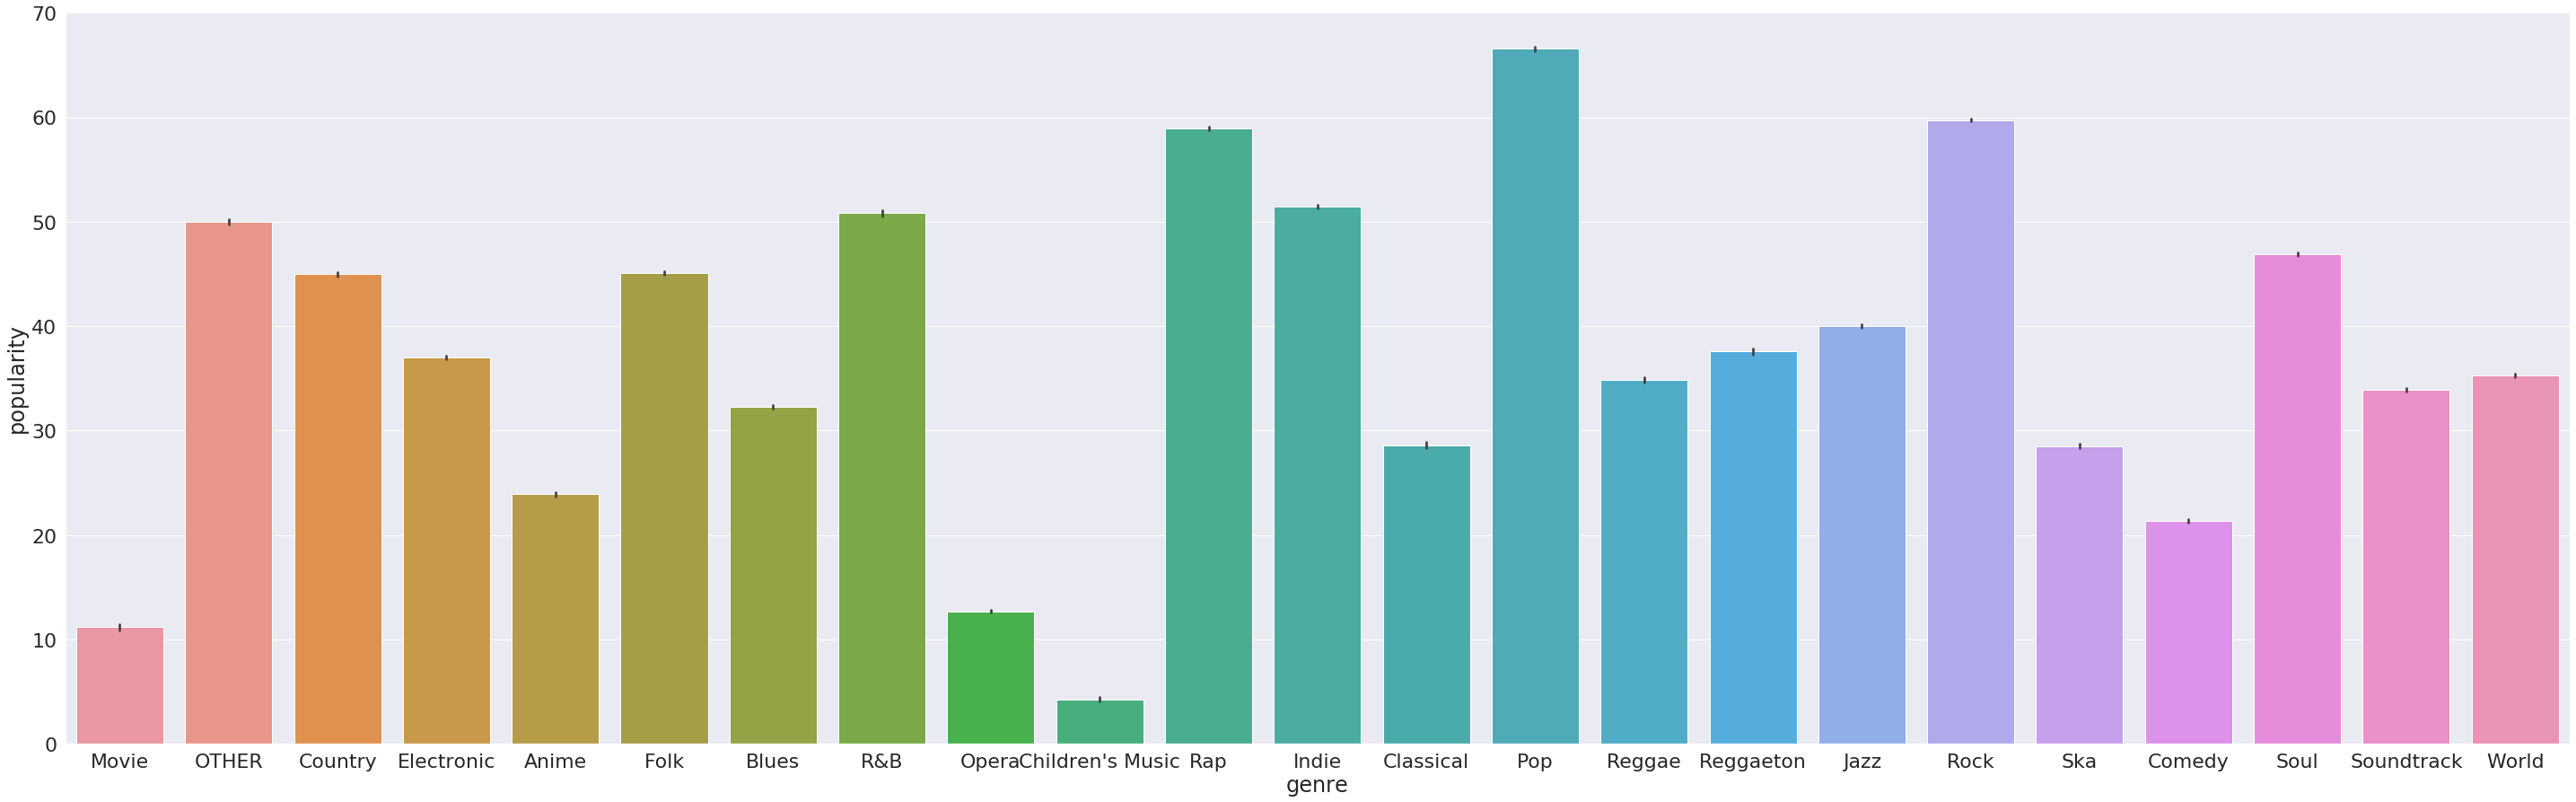

In [14]:
plt.figure(figsize=(50, 15))
sns.set(font_scale=2)
genre_to_popularity = sns.barplot(x = 'genre', y = 'popularity', data = data)

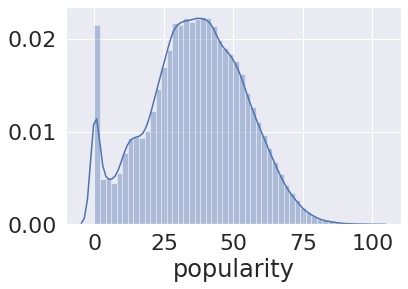

In [15]:
# Let's have a look at the distribution of the popularity
sns.distplot(data['popularity'])

As there are not too many possible values for categorical features we can one-hot-encode them for more efficient learning, using pandas built-in function.

In [16]:
data = pd.get_dummies(data, columns=["genre", "time_signature", "key","mode"])
pd.set_option("max_columns",None)
data.sample(10)

,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre_Anime,genre_Blues,genre_Children's Music,genre_Classical,genre_Comedy,genre_Country,genre_Electronic,genre_Folk,genre_Indie,genre_Jazz,genre_Movie,genre_OTHER,genre_Opera,genre_Pop,genre_R&B,genre_Rap,genre_Reggae,genre_Reggaeton,genre_Rock,genre_Ska,genre_Soul,genre_Soundtrack,genre_World,time_signature_3/4,time_signature_4/4,time_signature_5/4,time_signature_OTHER,key_A,key_A#,key_B,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Major,mode_Minor
107086,16,0.93900,0.243,0.0245,0.584000,0.8210,-19.633,0.0620,80.458,0.267,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
165602,23,0.14400,0.671,0.8590,0.000000,0.8850,-5.442,0.2800,90.374,0.803,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
151505,61,0.08810,0.855,0.6810,0.000004,0.0592,-4.955,0.0688,99.699,0.908,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
196210,1,0.98300,0.285,0.0683,0.000096,0.1310,-22.260,0.0518,92.088,0.144,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
168515,33,0.81500,0.698,0.9150,0.000000,0.2910,-10.339,0.9390,58.619,0.115,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
86227,39,0.45300,0.760,0.2750,0.000000,0.1680,-11.463,0.1020,120.022,0.305,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
19050,47,0.02200,0.628,0.9700,0.000000,0.3180,-6.011,0.0483,128.970,0.165,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
59724,49,0.59100,0.393,0.2760,0.000010,0.1130,-15.682,0.1360,46.212,0.443,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
31330,23,0.00192,0.461,0.8560,0.000000,0.0663,-4.435,0.0895,165.986,0.491,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
20228,50,0.09440,0.579,0.9290,0.000000,0.3130,-2.742,0.0747,133.012,0.653,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [17]:
# save the dataframe in a csv format so the train notebook can access it
data.to_csv('cleaned.csv', index=False)